# Linear Regression
**Book Sections:**

3.1 Simple Linear Regression, 3.2 Multiple Linear Regression, 3.3 Other Considerations in the Regression Model

Onedrive with dataset (too large to upload to Github): 
https://pitt-my.sharepoint.com/personal/nsk25_pitt_edu/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fnsk25%5Fpitt%5Fedu%2FDocuments%2FIE1171%20Linear%20Regression%20 Dataset 

Dataset: Home Mortgage Disclosure Act, National Loan Applications for 2020
https://ffiec.cfpb.gov/data-publication/dynamic-national-loan-level-dataset/2020 

Data field definitions/values: https://ffiec.cfpb.gov/documentation/2020/lar-data-fields/ 

## In this tutorial we will use the dataset with the following attributes as an example:
31 Attributes In the dataset. We are going to use the following:
1. Credit Score
2. First Time Homebuyer flag
3. Original Debt to Income Ratio
4. Number of Borrowers
5. Original Interest Rate - this is what we want to predict

This is a case of prediction because we want to predict a buyer’s mortgage interest rate (outcome) based on application information (predictors)

## How does Linear Regression Work?
The linear regression model has the form:
<div align = 'center'><font size = '6'>$Y=\beta_0+\beta_1X_1+...+\beta_pX_p+\epsilon$</font></div>

where $X_j$ represents the $j^th$ predictor and $\beta_j$ quantifies the association between that variable and the response. We interpret $\beta_j$ as the average effect on Y of a one unit increase in $X_j$, holding all other predictors fixed.

There are 2 Types of Linear Regression:
- Simple Linear Regression- used to predict a response on the basis of a single predictor variable.
- Multiple Linear Regression- used to predict a response on the basis of multiple predictor variables

Example from the textbook section 3.2:
<div align = 'center'><font size = '6'>$sales=\beta_0+\beta_1\times TV+\beta_2\times radio+\beta_2\times newspaper+\epsilon$</font></div>

Multiple linear regression model for the relationship between advertisement method and the resulting product sales.

![](./fig/LR/fig1.png)

Only TV and radio advertisements have a significance to product sales.


Implications: Bias in Algorithms used for Decision Making 
Article: Racial Bias in Mortgage Approval Aglorithms https://themarkup.org/denied/2021/08/25/the-secret-bias-hidden-in-mortgage-approval-algorithms 
https://themarkup.org/show-your-work/2021/08/25/how-we-investigated-racial-disparities-in-federal-mortgage-data 

Article: Inspecting Algorithms for Bias 
https://www.technologyreview.com/2017/06/12/105804/inspecting-algorithms-for-bias/ 




# Related Topics: forward vs backward selection, factor levels, dummy variables

## Forward vs backwards selection

### Forward selection:
1. Begins with a model that contains no variables (called the *Null Model*)
2. Begin adding the most significant variables one after the other
    - Variable significance can be calculated using a statistical significance test such as an f-test or t-test. The most significant variable will have the lowest p-value.
3. Continue to add significant variables until a pre-specified stopping rule is reached or until all the variables under consideration are included in the model
    - The pre-specified stopping rule could include a specific test of model prediction accuracy or a certain error level (such as MSE or MAE)

### Backwards selection:
1. Begins with a model that contains all variables under consideration (called the *Full Model*)
2. Then starts removing the least significant variables one after the other.
    - Variable significance can be calculated using a statistical significance test such as an f-test or t-test. The least significant variable will have the highest p-value.
3. Until a pre-specified stopping rule is reached or until no variable is left in the model.

### Factor Levels
*Factor levels-* a factor is a qualitative attribute variable. The number of levels is the number of possible values that the factor can have. 

### Dummy variables
*Dummy variables-* a variable that takes on one of two (or more)  binary outputs.
Ex: in the loan application tutorial the variable “first time home owner flag_n” is a dummy variable that changes the output no to 0 for not a first time homeowner and yes to 1 because linear regression cannot be performed using variables with a categorical output. 



In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import math
import sklearn
from sklearn import metrics
import seaborn as sns

In [5]:
#load file as a dataframe
df = pd.read_csv('larmortgagedata.csv')
#df
df

,Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,Metropolitan Statistical Area (MSA) Or Metropolitan Division,Mortgage Insurance Percentage (MI %),Number of Units,Occupancy Status,Original Combined Loan-to-Value (CLTV),Original Debt-to-Income (DTI) Ratio,...,Original Loan Term,Number of Borrowers,Seller Name,Servicer Name,Super Conforming Flag,Pre-HARP Loan Sequence Number,Program Indicator,HARP Indicator,Property Valuation Method,Interest Only (I/O) Indicator
0,778,202106,N,205105,NaN,0,1,P,79,33,...,360,1,Other sellers,Other servicers,NaN,NaN,9,NaN,1,N
1,787,202108,N,205107,NaN,0,1,P,80,24,...,360,2,Other sellers,U.S. BANK N.A.,NaN,NaN,9,NaN,2,N
2,712,202106,N,205105,NaN,0,1,P,71,42,...,360,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
3,790,202106,N,205105,NaN,0,1,P,69,24,...,360,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
4,662,202108,N,205107,45780.0,25,1,P,87,34,...,360,2,Other sellers,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",NaN,NaN,9,NaN,2,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960480,820,202108,N,203607,38900.0,0,1,P,35,24,...,180,1,Other sellers,Other servicers,NaN,NaN,9,NaN,1,N
960481,693,202108,N,203607,17460.0,0,1,P,75,40,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
960482,681,202108,N,205107,29620.0,30,1,P,95,37,...,360,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
960483,816,202108,N,203607,29620.0,0,1,P,63,37,...,180,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N


In [14]:
#checking dataset for null values
df.isna().sum()

Credit Score                                                         0
First Payment Date                                                   0
First Time Homebuyer Flag                                            0
Maturity Date                                                        0
Metropolitan Statistical Area (MSA) Or Metropolitan Division     83558
Mortgage Insurance Percentage (MI %)                                 0
Number of Units                                                      0
Occupancy Status                                                     0
Original Combined Loan-to-Value (CLTV)                               0
Original Debt-to-Income (DTI) Ratio                                  0
Original UPB                                                         0
Original Loan-to-Value (LTV)                                         0
Original Interest Rate                                               0
Channel                                                              0
Prepay

In [18]:
#encode the columns that include text as numerical categories
from sklearn.preprocessing import LabelEncoder

#create an instance of label encoder
labelencoder = LabelEncoder()

#encode binary outcomes for first time homeowner flag column
df["First Time Homebuyer Flag_N"] = labelencoder.fit_transform(df["First Time Homebuyer Flag"])

In [29]:
#identify which columns are our predictors and which is our target 
feature_cols= ['Credit Score', 'First Time Homebuyer Flag_N','Original Debt-to-Income (DTI) Ratio', 'Number of Borrowers']
predictors = df[feature_cols]
target_col = ['Original Interest Rate']
target = df[target_col]

In [30]:
#split data into training set and test set
x_train, x_test, y_train, y_test =  train_test_split(predictors,target,test_size = 0.3)

In [31]:
#initiate the linear regression model
linreg = LinearRegression()
#fit it to the training data
linreg.fit(x_train,y_train)
y_pred = linreg.predict(x_test)

In [34]:
#print the coefficients for each predictor
print('Coefficients: \n', linreg.coef_)

Coefficients: 
 [[-0.00028133  0.08951843  0.00264598 -0.02304955]]


/Users/nadjahkamara/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


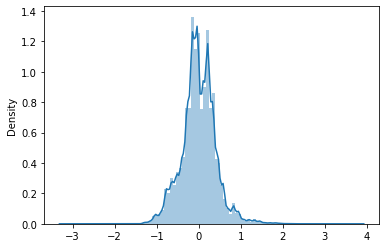

In [43]:
#plot the resdiual error for each point

sns.distplot((y_test-y_pred),bins = 100);

In [37]:
#print the mean absolute error, mean squared error, and root mean squared error to evaluate the model
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.3054083450218989
MSE: 0.16430077028461706
RMSE: 0.4053403141615907
